In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

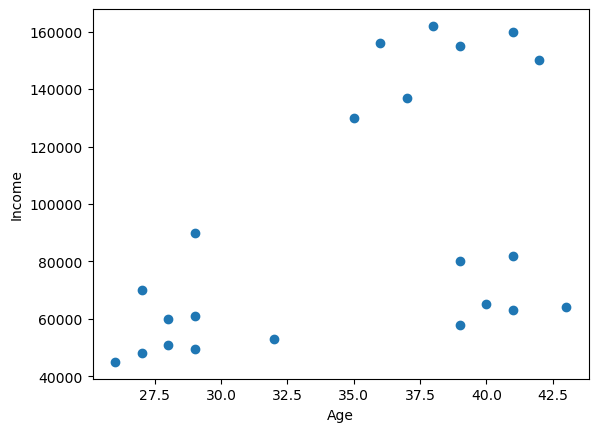

In [3]:
plt.scatter(df.Age, df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income")

In [4]:
from sklearn.cluster import KMeans

km = KMeans()

km

KMeans()

In [5]:
# Elbow Method
# To determine the value of k ("num of clusters")

                                                                                                    
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when t

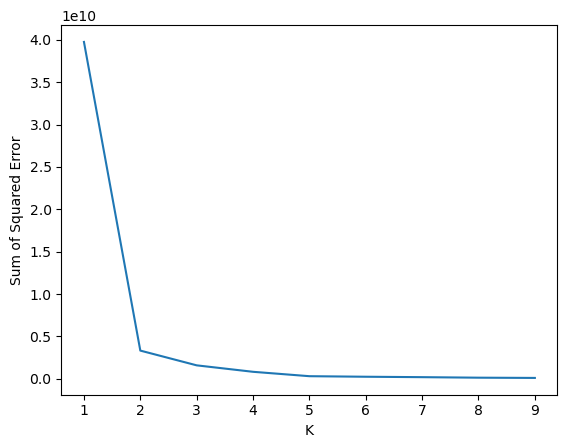

In [6]:
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

In [7]:
km = KMeans(n_clusters=3)

km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[["Age","Income($)"]])
df["Cluster"] = y_predicted

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# To find the centroids of clusters
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [11]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [12]:
df

,Name,Age,Income($),Cluster
0,Rob,27,0.213675,0
1,Michael,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [13]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

In [14]:
scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [15]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [16]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\BAVEETH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
df["Cluster"] = y_predicted

In [28]:
df.groupby('Cluster').describe()

Age                                                              \
        count      mean       std       min       25%       50%       75%   
Cluster                                                                     
0         9.0  0.137255  0.101885  0.000000  0.058824  0.117647  0.176471   
1         6.0  0.852941  0.089210  0.764706  0.779412  0.852941  0.882353   
2         7.0  0.722689  0.150793  0.529412  0.617647  0.705882  0.823529   

                  Income($)                                                    \
              max     count      mean       std       min       25%       50%   
Cluster                                                                         
0        0.352941       9.0  0.116334  0.120604  0.000000  0.038462  0.068376   
1        1.000000       6.0  0.202279  0.084381  0.111111  0.155983  0.166667   
2        0.941176       7.0  0.897436  0.103156  0.726496  0.841880  0.940171   

                             
              75%       max  
Cluster                      
0        0.136752  0.384615  
1        0.267094  0.316239  
2        0.965812  1.000000

In [42]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [43]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

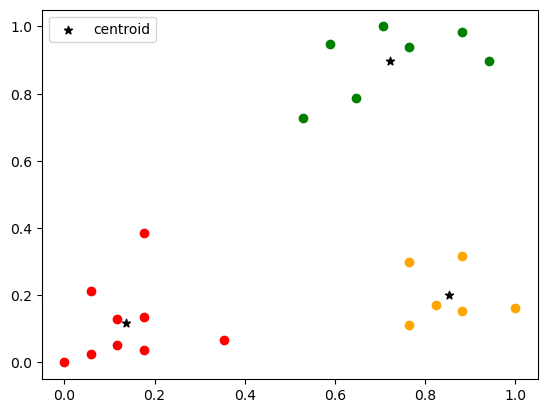

In [44]:
km.cluster_centers_

plt.scatter(df1.Age,df1['Income($)'], color='orange')
plt.scatter(df2.Age,df2['Income($)'], color='green')
plt.scatter(df3.Age,df3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.legend()